# PREDICTING THE CHANCES OF ADMISSION WITH GIVEN FEATURES

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import warning
import warnings 
warnings.filterwarnings('ignore')

In [2]:
## Importing the data
data = pd.read_excel("Admission_Prediction.xlsx")

In [3]:
## Getting the first five rows of the dataset
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [4]:
## Getting the last five rows of the dataset
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73
499,500.0,327.0,113.0,4.0,4.5,4.5,9.04,0.0,0.84


In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    float64
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    float64
 8   Chance of Admit    500 non-null    float64
dtypes: float64(9)
memory usage: 35.3 KB


### OBSERVATION:
* Serial no is unique idendity column
* GRE Score, TOEFL Score, University Rating, has missing values

## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

In [7]:
## Renaming certain columns 
data.rename(columns={'GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score', 'University Rating':'University_Rating', 
                      'Chance of Admit':'Chance_of_Admit'},inplace=True)

In [8]:
data.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

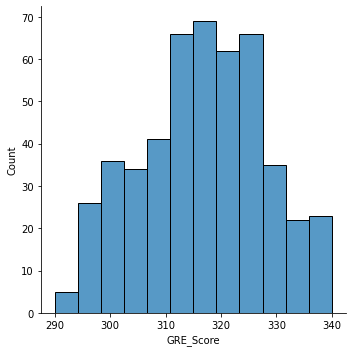

In [9]:
# Analysing GRE Score

sns.displot(data.GRE_Score.dropna(axis=0))
plt.show()

### OBSERVATION: 
* GRE Score has normal distribution
* Most of the student has score between 310 to 330

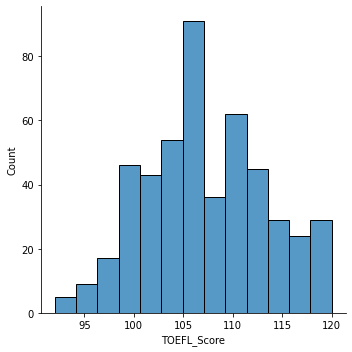

In [10]:
## Analyzing TOEFL Score

sns.displot(data.TOEFL_Score.dropna(axis=0))
plt.show()

### OBSERVATION:
* TOEFL Score has normal distribution

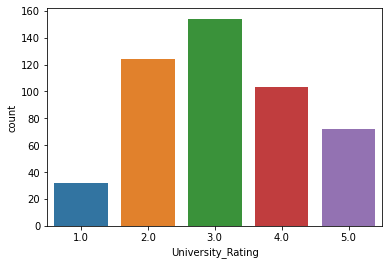

In [11]:
## Analyzing University Rating

sns.countplot(data.University_Rating)
plt.show()

In [12]:
data.University_Rating.value_counts()

3.0    154
2.0    124
4.0    103
5.0     72
1.0     32
Name: University_Rating, dtype: int64

### OBSERVATION:
* Most of the University has rating of 3.
* 72 universities seems to be best ones.
* 32 universities has worst performance.

In [13]:
## Analysing SOP

data.SOP.value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

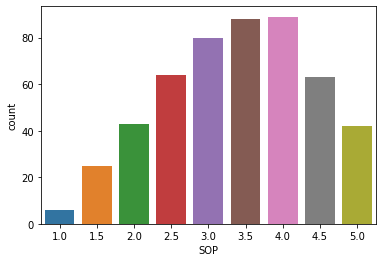

In [14]:
sns.countplot(x='SOP', data=data)
plt.show()

### OBSERVATION:
* There seems to be less student wgo are able to impress the admission committee

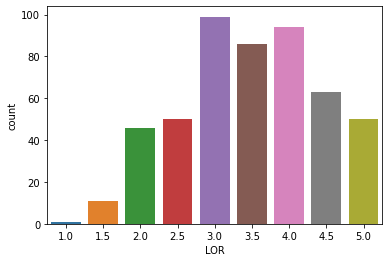

In [15]:
# Analysing LOR
sns.countplot(x='LOR', data=data)
plt.show()

### OBSERVATION:
* Average candidates have applied for admission

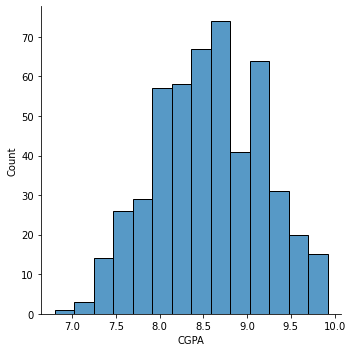

In [16]:
## Analysing CGPA

sns.displot(data.CGPA)
plt.show()

### OBSERVATION:
* Most of the student have 8 to 9 CGPA.


<AxesSubplot:xlabel='Research', ylabel='count'>

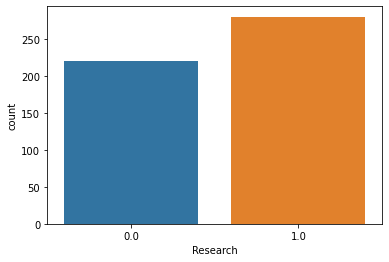

In [17]:
### Analysing Reserach
sns.countplot(x='Research', data=data)

### OBSERVATION:
* The distribustion seems to be balanced, however students done research are more

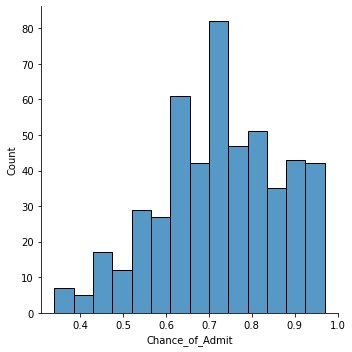

In [18]:
## Analysing Chance of Admit

sns.displot(data.Chance_of_Admit)
plt.show()

## BIVARIATE ANALYSIS

In [19]:
data.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [20]:
data1 = data[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research']]

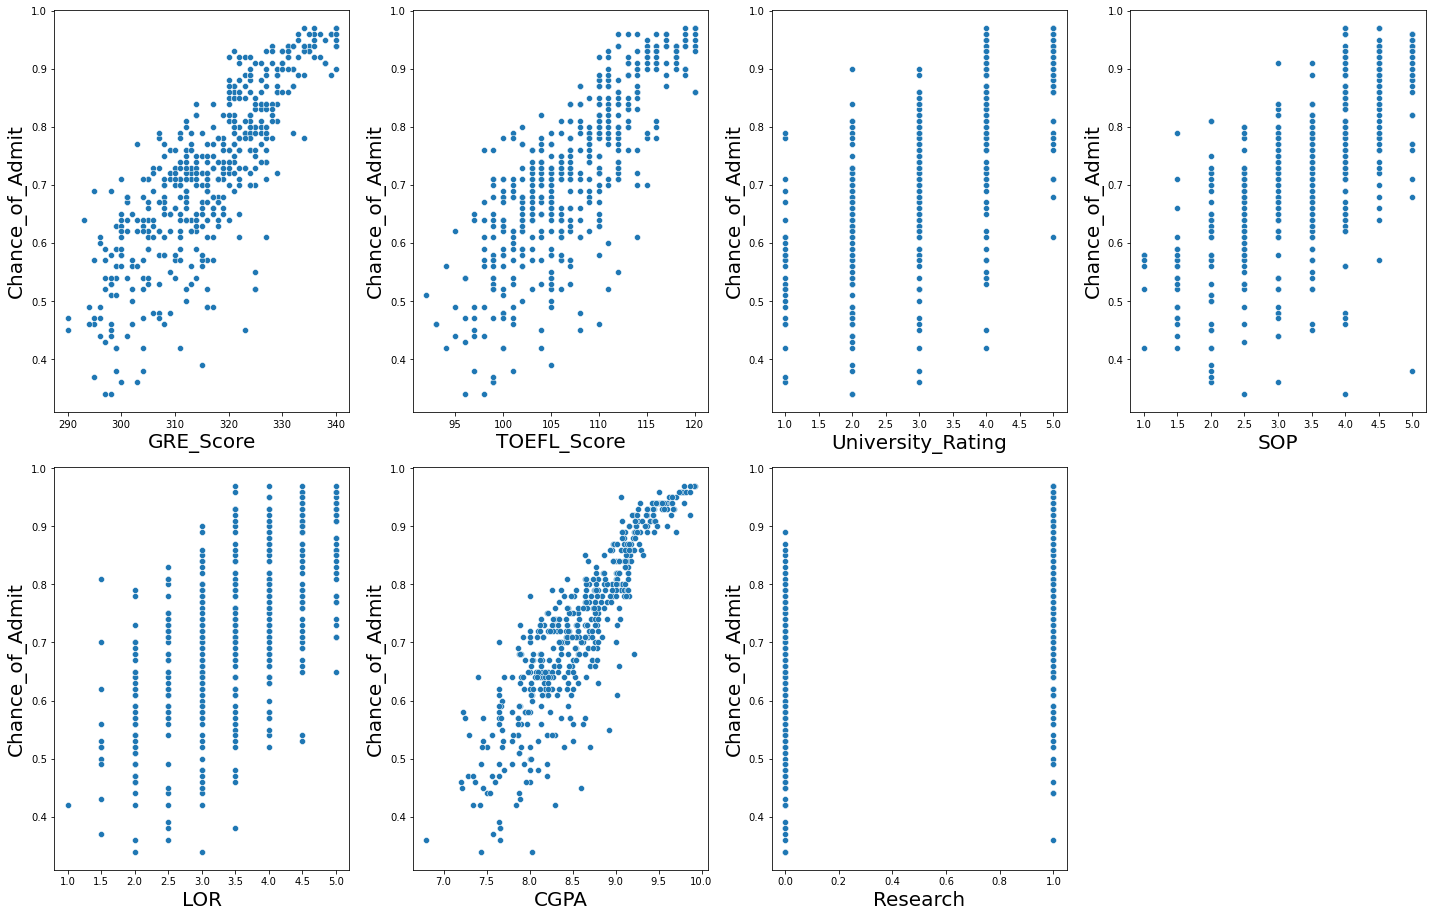

In [21]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data1[column].dropna(axis=0), y=data.Chance_of_Admit)
        
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Chance_of_Admit', fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

### OBSERVATION:
* There seems to be linear relationship between dependent and independent variable

In [22]:
## Checking for MISSING variables
data.isnull().sum()

Serial No.            0
GRE_Score            15
TOEFL_Score          10
University_Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_Admit       0
dtype: int64

### OBSERVATION:
* Since GRE_Score and TOEFL_Score are in normal distribuation, Mean can be a better substitution for missing data.
* University_Rating is ordinal data, so mode imputation can be used.


In [23]:
## Getting the missing data rows

data.loc[data['GRE_Score'].isnull()==True]

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
12,13.0,NaN,112.0,4.0,4.0,4.5,9.10,1.0,0.78
23,24.0,NaN,119.0,5.0,5.0,4.5,9.70,1.0,0.95
36,37.0,NaN,106.0,2.0,4.0,4.0,8.40,0.0,0.64
51,52.0,NaN,100.0,2.0,1.5,3.5,7.90,1.0,0.56
70,71.0,NaN,118.0,5.0,5.0,5.0,9.64,1.0,0.94
124,125.0,NaN,106.0,4.0,2.5,3.0,8.47,0.0,0.57
155,156.0,NaN,109.0,3.0,3.0,3.0,8.69,0.0,0.77
182,183.0,NaN,100.0,2.0,3.0,3.5,7.88,0.0,0.68
218,219.0,NaN,110.0,4.0,3.0,3.5,8.97,1.0,0.84


In [24]:
from scipy import stats
stats.mode(data.University_Rating)

ModeResult(mode=array([3.]), count=array([154]))

In [25]:
## Imputation of missing data using inbiult method fillna

data['University_Rating'] = data['University_Rating'].fillna(data['University_Rating'].mode()[0])

data['GRE_Score'] = data['GRE_Score'].fillna(data['GRE_Score'].mean())

data['TOEFL_Score'] = data['TOEFL_Score'].fillna(data['TOEFL_Score'].mean())

In [26]:
data.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

### OBSERVATION:
* There seems to be no missing values

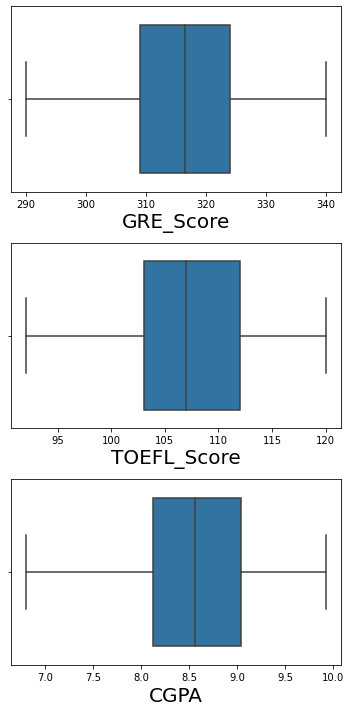

In [27]:
### Check for OUTLIERS

box = data[['GRE_Score', 'TOEFL_Score', 'CGPA']]

plt.figure(figsize=(5,10), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=6:
        ax = plt.subplot(3,1,plotnumber)
        sns.boxplot(x=box[column])
        
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

### OBSERVATION:
* There seems to be no OUTLIERS

In [28]:
## Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[['GRE_Score', 'TOEFL_Score', 'CGPA']] = sc.fit_transform(data[['GRE_Score', 'TOEFL_Score', 'CGPA']])

In [29]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.0,1.842741e+00,1.788542,4.0,4.5,4.5,1.776806,1.0,0.92
1,2.0,6.708143e-01,-0.031058,4.0,4.0,4.5,0.485859,1.0,0.76
2,3.0,5.124333e-15,-0.527313,3.0,3.0,3.5,-0.954043,1.0,0.72
3,4.0,4.905178e-01,0.465197,3.0,3.5,2.5,0.154847,1.0,0.80
4,5.0,-2.306679e-01,-0.692731,2.0,2.0,3.0,-0.606480,0.0,0.65


## Feature Selection

In [30]:
## Dropping redundant columns 

data.drop(['Serial No.'], axis=1, inplace=True)

<AxesSubplot:>

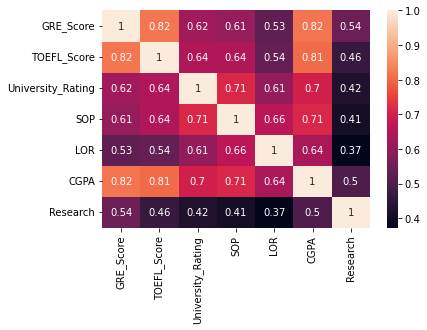

In [31]:
## Checking for correlation

sns.heatmap(data.drop('Chance_of_Admit', axis=1).corr(),annot=True)

### OBSERVATION:
There seems to be no highly correlated features in the dataset.

## Model Building

In [32]:
X = data.drop('Chance_of_Admit', axis=1)
y= data.Chance_of_Admit

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)
y_hat = LR.predict(X_test)

## Model Evaluation

In [35]:
y_train_predict = LR.predict(X_train)

In [36]:
from sklearn.metrics import r2_score

In [37]:
train_score = r2_score(y_train, y_train_predict)
train_score

0.8205681087702014

In [38]:
test_score = r2_score(y_test, y_hat)
test_score

0.8175156689543607

In [39]:
## Adjusted R2 Score

In [40]:
X_train.shape, X_test.shape

((375, 7), (125, 7))

In [41]:
train_adjusted_r2 = 1-(1-0.82)*(375-1)/(375-7-1)
train_adjusted_r2

0.816566757493188

In [42]:
test_adjusted_r2 = 1-(1-0.81)*(125-1)/(125-7-1)
test_adjusted_r2

0.7986324786324787